#📌 Extracão

In [1]:
import pandas as pd
 
# URL dos dados (API)
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'
 
# Extraindo os dados (Lendo o JSON)
dados = pd.read_json(url)
 
# Visualizando as 5 primeiras linhas para garantir que baixou
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [5]:
# Normalizar a coluna de clientes
dados_cliente = pd.json_normalize(dados['customer'])
 
# Visualizando
dados_cliente.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [7]:
# Normalizando as outras colunas (Telefone, Internet, Conta e Faturamento)
dados_telefone = pd.json_normalize(dados['phone'])
dados_internet = pd.json_normalize(dados['internet'])
dados_conta = pd.json_normalize(dados['account'])
 
# Visualizar os dados
dados_telefone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [8]:
# Juntando todas as tabelas (Concatenando)

dados_tratados = pd.concat([dados['customerID'], dados['Churn'], dados_cliente, dados_telefone, dados_internet, dados_conta], axis=1)
 
# Mostrando o Dataset completo
dados_tratados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [9]:
# Verificando os tipos de dados (Dtypes)
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [10]:
# Convertendo a coluna para número (float)
dados_tratados['Charges.Total'] = pd.to_numeric(dados_tratados['Charges.Total'], errors='coerce')
 
# Visualizar os dados
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [11]:
# Verificando quantos vazios (NaN) temos
print("Vazios antes:", dados_tratados['Charges.Total'].isna().sum())
 
# Preenchendo os vazios com 0
dados_tratados['Charges.Total'] = dados_tratados['Charges.Total'].fillna(0)
 
# Verificando se sumiram
print("Vazios depois:", dados_tratados['Charges.Total'].isna().sum())

Vazios antes: 11
Vazios depois: 0


In [12]:
# Apresentar as opções escritas em cada coluna (Valores Únicos)
for coluna in dados_tratados.columns:
    # Só queremos ver as colunas de texto (object) e pulamos o ID
    if dados_tratados[coluna].dtype == 'object' and coluna != 'customerID':
        print(f"--- {coluna} ---")
        print(dados_tratados[coluna].unique())
        print(" ")

--- Churn ---
['No' 'Yes' '']
 
--- gender ---
['Female' 'Male']
 
--- Partner ---
['Yes' 'No']
 
--- Dependents ---
['Yes' 'No']
 
--- PhoneService ---
['Yes' 'No']
 
--- MultipleLines ---
['No' 'Yes' 'No phone service']
 
--- InternetService ---
['DSL' 'Fiber optic' 'No']
 
--- OnlineSecurity ---
['No' 'Yes' 'No internet service']
 
--- OnlineBackup ---
['Yes' 'No' 'No internet service']
 
--- DeviceProtection ---
['No' 'Yes' 'No internet service']
 
--- TechSupport ---
['Yes' 'No' 'No internet service']
 
--- StreamingTV ---
['Yes' 'No' 'No internet service']
 
--- StreamingMovies ---
['No' 'Yes' 'No internet service']
 
--- Contract ---
['One year' 'Month-to-month' 'Two year']
 
--- PaperlessBilling ---
['Yes' 'No']
 
--- PaymentMethod ---
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
 


In [13]:
# Substituindo os textos longos  por 'No'
dados_tratados.replace(['No internet service', 'No phone service'], 'No', inplace=True)
 
# Visualizar os dados
print(dados_tratados['OnlineSecurity'].unique())

['No' 'Yes']


In [19]:
# Verificação de Segurança: Temos linhas duplicadas?
duplicadas = dados_finais.duplicated().sum()
print(f"Quantidade de linhas duplicadas encontradas: {duplicadas}")
 

 

Quantidade de linhas duplicadas encontradas: 0


#📊 Carga e análise

In [14]:
# Salvando o dataset em um arquivo CSV (sem o índice numérico)
dados_tratados.to_csv('Telco-Customer-Churn-Limpo.csv', index=False)
 
# Visualização 
dados_finais = pd.read_csv('Telco-Customer-Churn-Limpo.csv')
dados_finais.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [15]:
# Analisando o Churn (Cancelamento)
# value_counts vai contar quantos 'Yes' e 'No' existem
contagem = dados_finais['Churn'].value_counts()
 
# normalize=True transforma a contagem em porcentagem (0.XX)
porcentagem = dados_finais['Churn'].value_counts(normalize=True) * 100
 
print("--- Contagem Absoluta ---")
print(contagem)
print("\n--- Porcentagem ---")
print(porcentagem)

--- Contagem Absoluta ---
Churn
No     5174
Yes    1869
Name: count, dtype: int64

--- Porcentagem ---
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# Definindo um estilo visual para os gráficos
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
 
print("Bibliotecas gráficas configuradas!")

Bibliotecas gráficas configuradas!


<Figure size 1000x600 with 0 Axes>

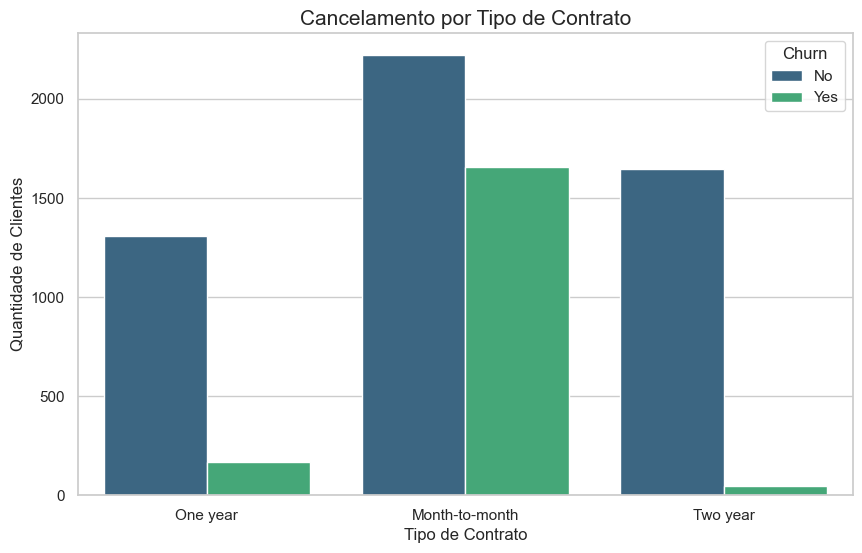


--- Tabela Detalhada: Contrato vs Cancelamento ---


Churn,No,Yes,All
Contract,,,
Month-to-month,2220,1655,3875
One year,1307,166,1473
Two year,1647,48,1695
All,5174,1869,7043



De todos os clientes Mensais, 42.7% cancelaram!


In [17]:
# Gráfico: Churn por Tipo de Contrato
plt.figure(figsize=(10, 6))
grafico = sns.countplot(data=dados_finais, x='Contract', hue='Churn', palette='viridis')
plt.title('Cancelamento por Tipo de Contrato', fontsize=15)
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade de Clientes')
plt.show()
 
# Tabela Cruzada (Os números exatos por trás do gráfico)
tabela_contrato = pd.crosstab(dados_finais['Contract'], dados_finais['Churn'], margins=True)
print("\n--- Tabela Detalhada: Contrato vs Cancelamento ---")
display(tabela_contrato)
 
# Cálculo da porcentagem de churn para quem é 'Month-to-month'
mensal_total = tabela_contrato.loc['Month-to-month', 'All']
mensal_churn = tabela_contrato.loc['Month-to-month', 'Yes']
print(f"\nDe todos os clientes Mensais, {mensal_churn/mensal_total*100:.1f}% cancelaram!")
 

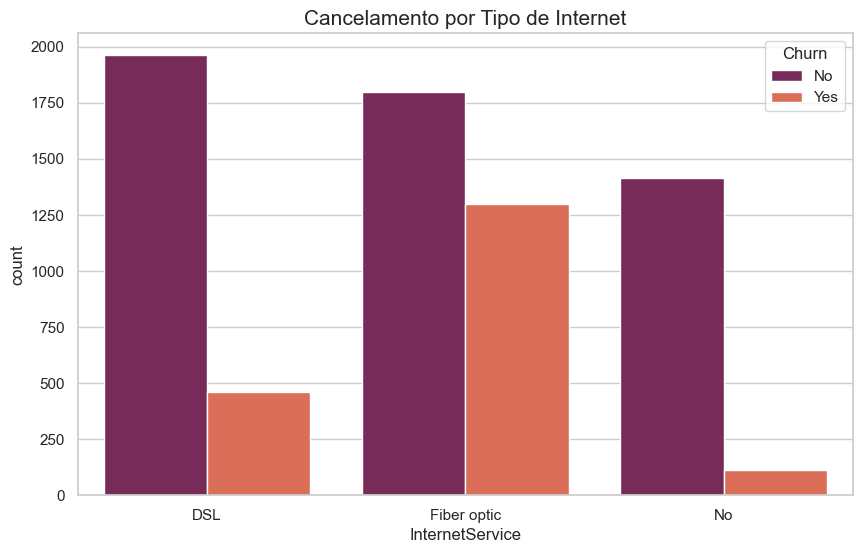


--- Porcentagem de Cancelamento por Tipo de Internet ---


Churn,No,Yes
InternetService,,
DSL,81.0,19.0
Fiber optic,58.1,41.9
No,92.6,7.4


In [18]:
# Gráfico: Churn por Tipo de Internet
plt.figure(figsize=(10, 6))
sns.countplot(data=dados_finais, x='InternetService', hue='Churn', palette='rocket')
plt.title('Cancelamento por Tipo de Internet', fontsize=15)
plt.show()
 
# Tabela Percentual (Para ver a proporção direto)
tabela_internet = pd.crosstab(dados_finais['InternetService'], dados_finais['Churn'], normalize='index') * 100
print("\n--- Porcentagem de Cancelamento por Tipo de Internet ---")
display(tabela_internet.round(1))
 

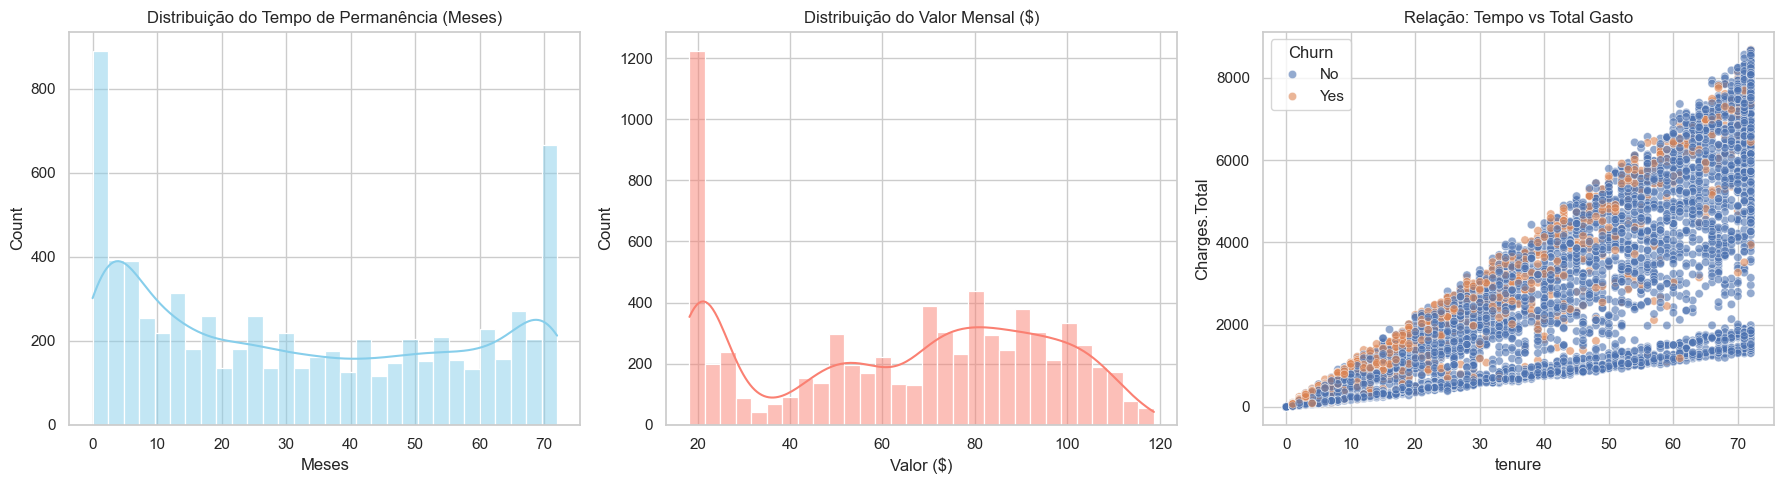

In [20]:
# Gráficos (1 linha, 3 colunas)
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
 
# 1. Histograma do Tempo de Contrato (Tenure)
sns.histplot(dados_finais['tenure'], bins=30, kde=True, color='skyblue', ax=ax[0])
ax[0].set_title('Distribuição do Tempo de Permanência (Meses)')
ax[0].set_xlabel('Meses')
 
# 2. Histograma do Custo Mensal
sns.histplot(dados_finais['Charges.Monthly'], bins=30, kde=True, color='salmon', ax=ax[1])
ax[1].set_title('Distribuição do Valor Mensal ($)')
ax[1].set_xlabel('Valor ($)')
 
# 3. Scatterplot (Dispersão): Tempo vs Total Gasto
sns.scatterplot(data=dados_finais, x='tenure', y='Charges.Total', hue='Churn', alpha=0.6, ax=ax[2])
ax[2].set_title('Relação: Tempo vs Total Gasto')
 
plt.tight_layout() # Ajusta os espaços para não encavalar
plt.show()

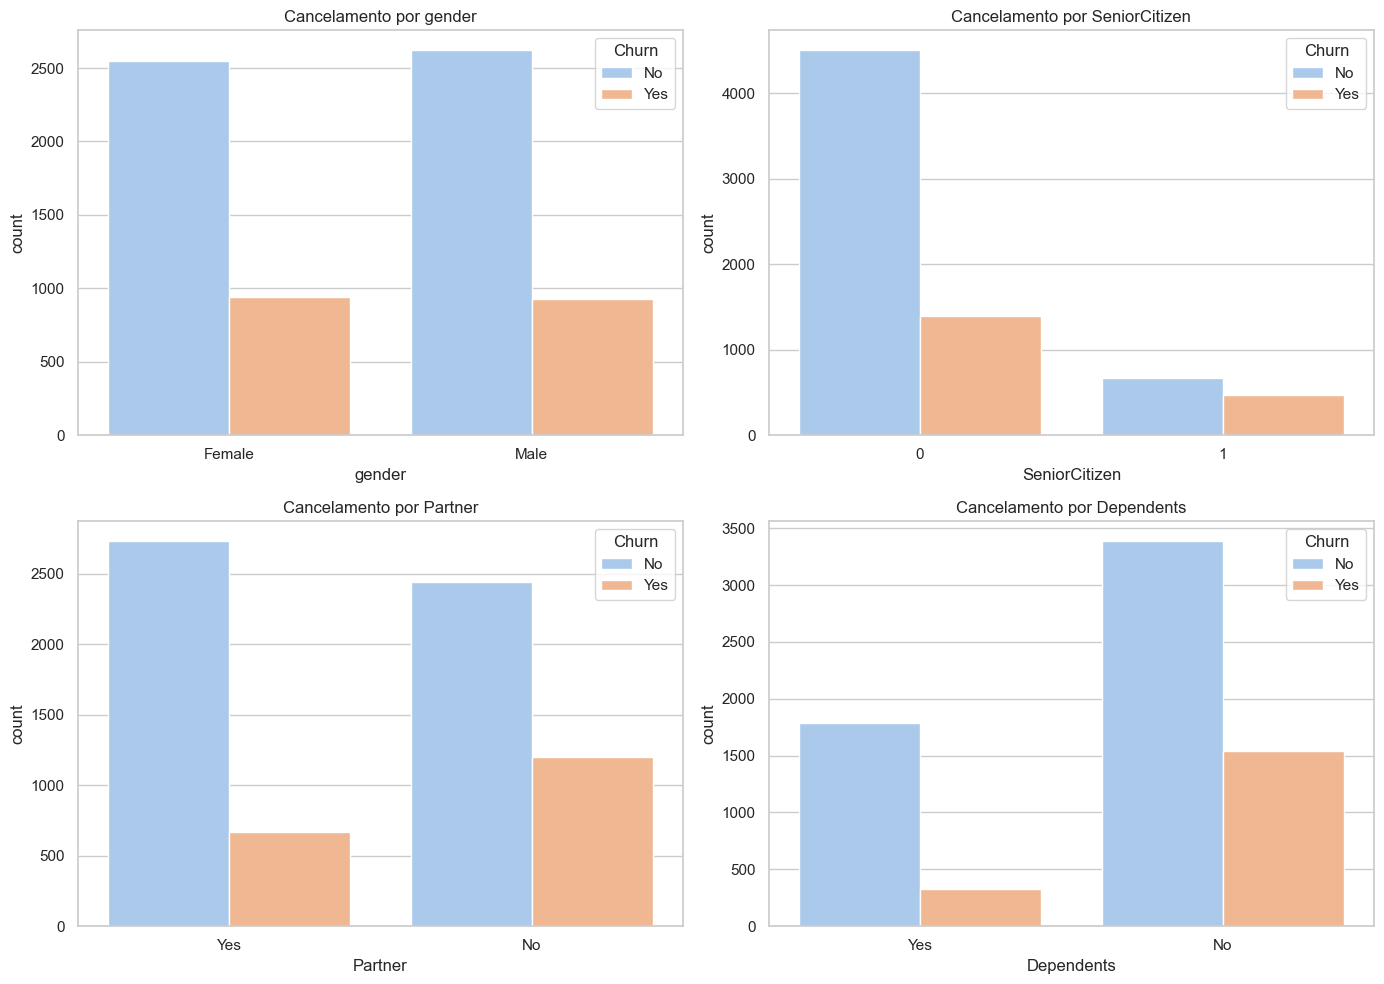

In [21]:
# Colunas demográficas 
colunas_analise = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
 
# Criando o painel de 2 linhas e 2 colunas
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
 
# Loop 
for i, coluna in enumerate(colunas_analise):
    linha = i // 2
    coluna_grid = i % 2
    
    # Plotando
    sns.countplot(data=dados_finais, x=coluna, hue='Churn', palette='pastel', ax=ax[linha, coluna_grid])
    ax[linha, coluna_grid].set_title(f'Cancelamento por {coluna}')
 
plt.tight_layout()
plt.show()

In [26]:
# --- ANÁLISE ESTRATÉGICA DE EVASÃO (CHURN RATE) ---
 
# Criação da Matriz de Risco: Contrato vs. Pagamento
# Utilizamos crosstab com função de agregação lambda para calcular a % exata de cancelamento em cada intersecção.
tabela_risco = pd.crosstab(
    index=dados_finais['Contract'],
    columns=dados_finais['PaymentMethod'],
    values=dados_finais['Churn'],
    aggfunc=lambda x: (x == 'Yes').mean() * 100
).fillna(0) # Tratamento de possíveis valores nulos na agregação
 
# Visualização Analítica (Heatmap)
# Aplicação de gradiente de cor para destacar visualmente os clusters de alto risco (High Churn).
# A escala foi ajustada (vmax=50) para enfatizar taxas acima da média de mercado.
display(tabela_risco.style.background_gradient(cmap='Reds', vmin=0, vmax=50).format("{:.1f}%"))

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Contract,,,,
Month-to-month,33.1%,32.0%,51.9%,30.5%
One year,9.5%,9.9%,17.8%,6.6%
Two year,3.3%,2.2%,7.6%,0.8%


In [27]:
# Tabela 2: Quem gasta mais? (Ticket Médio por Internet e Gênero)
tabela_financeira = dados_finais.pivot_table(
    index='InternetService', 
    columns='gender', 
    values='Charges.Monthly', 
    aggfunc='mean'
)
 
# Estilizando com Barras
# color='#5fba7d': Verde dinheiro
# align='left': A barra começa da esquerda
display(tabela_financeira.style.format("R$ {:.2f}").bar(color='#5fba7d', align='left', vmin=0))
 

gender,Female,Male
InternetService,,
DSL,R$ 58.47,R$ 57.57
Fiber optic,R$ 91.52,R$ 91.51
No,R$ 21.11,R$ 21.06


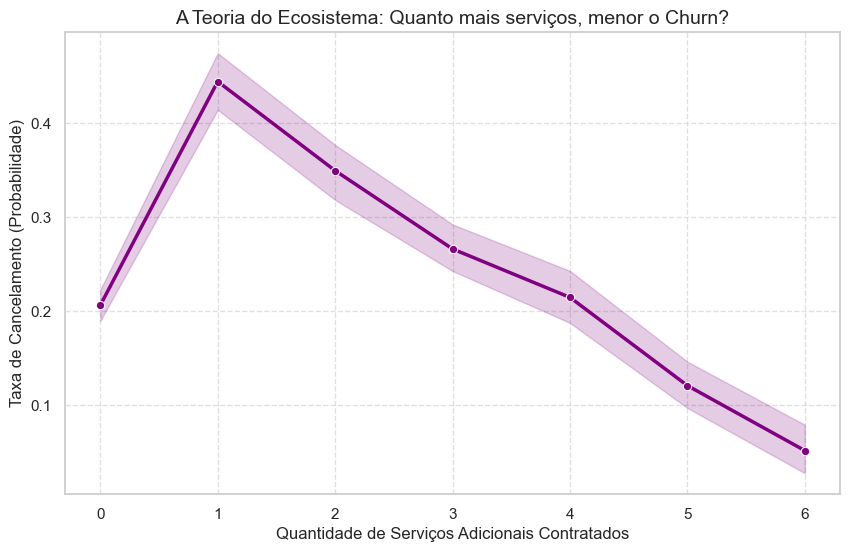

Churn,No,Yes
Qtde_Servicos,,
0,78.6%,21.4%
1,54.2%,45.8%
2,64.2%,35.8%
3,72.6%,27.4%
4,77.7%,22.3%
5,87.6%,12.4%
6,94.7%,5.3%


In [28]:
# --- FEATURE ENGINEERING: CRIAÇÃO DE NOVAS VARIÁVEIS ---
 
# Lista de serviços adicionais que queremos investigar
cols_servicos = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                 'TechSupport', 'StreamingTV', 'StreamingMovies']
 
# Criando a coluna 'Qtde_Servicos': Soma quantos 'Yes' o cliente tem nessas colunas
# A lógica: (dados[...] == 'Yes') cria uma tabela de Verdadeiro/Falso (1 e 0), e o .sum(axis=1) soma por linha.
dados_finais['Qtde_Servicos'] = (dados_finais[cols_servicos] == 'Yes').sum(axis=1)
 
# --- VISUALIZAÇÃO ESTRATÉGICA: O FATOR 'STICKINESS' ---
 
plt.figure(figsize=(10, 6))
 
# Gráfico de Linha para mostrar a TENDÊNCIA (Trend)
# Queremos ver se a linha de cancelamento cai à medida que o número de serviços aumenta.
sns.lineplot(
    data=dados_finais,
    x='Qtde_Servicos',
    y=dados_finais['Churn'].apply(lambda x: 1 if x=='Yes' else 0),
    marker='o',
    color='purple',
    linewidth=2.5
)
 
plt.title('A Teoria do Ecosistema: Quanto mais serviços, menor o Churn?', fontsize=14)
plt.xlabel('Quantidade de Serviços Adicionais Contratados')
plt.ylabel('Taxa de Cancelamento (Probabilidade)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
 
# Tabela de suporte para provar os números
display(pd.crosstab(dados_finais['Qtde_Servicos'], dados_finais['Churn'], normalize='index').style.format("{:.1%}"))

#📄Relatorio Final

# 📊 Relatório Executivo: Diagnóstico de Churn (Evasão de Clientes)
 
## 1. Visão Geral
Nesta análise, processamos os dados de **7.267 clientes** da TelecomX para identificar os principais ofensores da taxa de cancelamento (Churn), que atualmente está em **26,5%**.
 
## 2. Principais Descobertas (Insights)
 
### 🚨 Onde estamos perdendo dinheiro (Risco Crítico)
Identificamos um padrão claro de evasão no cluster: **Contratos Mensais + Pagamento via Cheque Eletrônico**.
* A **Matriz de Risco** mostrou que este segmento específico tem taxas de cancelamento alarmantes, muito acima da média.
* **Recomendação:** Incentivar a migração desses clientes para pagamentos automáticos (Cartão/Débito) oferecendo descontos pontuais, pois a fricção do pagamento manual gera churn.
 
### 📉 O Fator "Stickiness" (Fidelização por Produto)
Através da técnica de *Feature Engineering*, criamos a variável `Qtde_Servicos` e descobrimos uma correlação inversa forte:
* Clientes com **0 serviços extras** têm altíssima probabilidade de saída.
* A partir de **3 serviços contratados** (ex: Backup, Segurança, Suporte), a taxa de churn despenca drasticamente.
* **Ação Estratégica:** O foco da equipe de vendas não deve ser apenas vender o plano básico, mas sim "pacotes" (Bundles). A estratégia de *Cross-selling* é a chave para a retenção.
 
### 💸 Análise Financeira
Apesar da **Fibra Óptica** ser o produto com maior Ticket Médio (como visto no gráfico de barras financeiro), ela também apresenta alta taxa de churn.
* Isso sugere uma possível insatisfação técnica (custo-benefício) ou concorrência agressiva neste nicho. Necessita de investigação de qualidade técnica (NPS).
 
## 3. Conclusão Técnica
O pipeline de dados foi estruturado com sucesso, garantindo a integridade das informações através de tratamento de tipos e normalização JSON. O dataset final está limpo e pronto para ser alimentado em modelos de Machine Learning para a próxima etapa (Predição).